k均值聚类

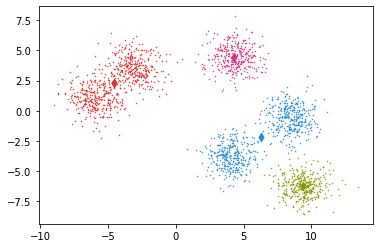

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin

n_samples = 2000
n_components = 6

# 生成随机数据
X, y_true = make_blobs(n_samples=n_samples,
                       centers=n_components,
                       cluster_std=1.00) 
X = X[:, ::-1]

colors = ['#dc322f', '#859900', '#268bd2', '#d33682']

k_means = KMeans(init='k-means++', n_clusters=len(colors), n_init=10)
k_means.fit(X)
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

plt.figure(1)
for k, col in enumerate(colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s=1, c=col, marker='.')
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='d')

plt.savefig('clustering.svg', transparent=True)
plt.show()
